<a href="https://colab.research.google.com/github/EmilSeyfullayev/azpromo-case-task-interview/blob/main/3_AzPromo_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_style('whitegrid')

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/AzPromo/forecasting_data_aze.xlsx')

In [ ]:
data = df

In [ ]:
df = np.array(df['final_price_usd']).reshape(-1,1)

In [ ]:
train_index = round(len(df)*0.1)
train = df[:-train_index]
test = df[-train_index:]
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
# train = scaler.fit_transform(train.reshape(-1,1))
# test = scaler.transform(test.reshape(-1,1))

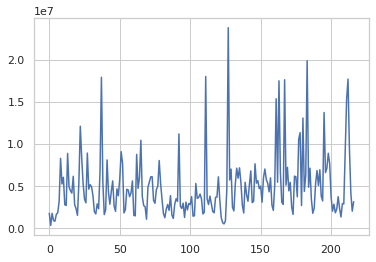

In [ ]:
plt.plot(train)

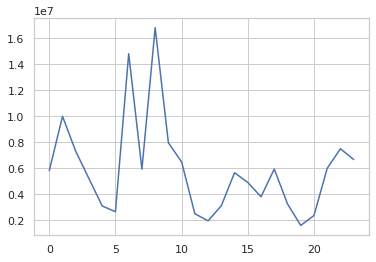

In [ ]:
plt.plot(test)

In [ ]:
batch_len = 5
batch_count = 1 

from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
train_generated = TimeseriesGenerator(train, train, length=batch_len, 
                                      batch_size=batch_count)
test_generated = TimeseriesGenerator(test, test, length=batch_len, 
                                     batch_size=batch_count)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
lstm = Sequential()
lstm.add(LSTM(300, activation='relu', 
              input_shape=((batch_len,batch_count))))
lstm.add(Dense(1))

In [ ]:
lstm.compile(optimizer='adam', loss='mse')

In [ ]:
lstm.fit(train_generated, validation_data=test_generated, epochs=100,
        callbacks=[EarlyStopping(patience=20)])

Epoch 1/100
212/212 [==============================] - 8s 26ms/step - loss: 17670846021632.0000 - val_loss: 16510444634112.0000
Epoch 2/100
212/212 [==============================] - 3s 12ms/step - loss: 16116261847040.0000 - val_loss: 16835399385088.0000
Epoch 3/100
212/212 [==============================] - 3s 13ms/step - loss: 15211253727232.0000 - val_loss: 18845863510016.0000
Epoch 4/100
212/212 [==============================] - 3s 13ms/step - loss: 16494864891904.0000 - val_loss: 20182661595136.0000
Epoch 5/100
212/212 [==============================] - 3s 13ms/step - loss: 16707331555328.0000 - val_loss: 19594657923072.0000
Epoch 6/100
212/212 [==============================] - 3s 13ms/step - loss: 16225983791104.0000 - val_loss: 18725499568128.0000
Epoch 7/100
212/212 [==============================] - 3s 13ms/step - loss: 15974850887680.0000 - val_loss: 18153142747136.0000
Epoch 8/100
212/212 [==============================] - 3s 13ms/step - loss: 15806742134784.0000 - val_lo

In [ ]:
# lstm_losses = pd.DataFrame(lstm.history.history)
# lstm_losses.plot()

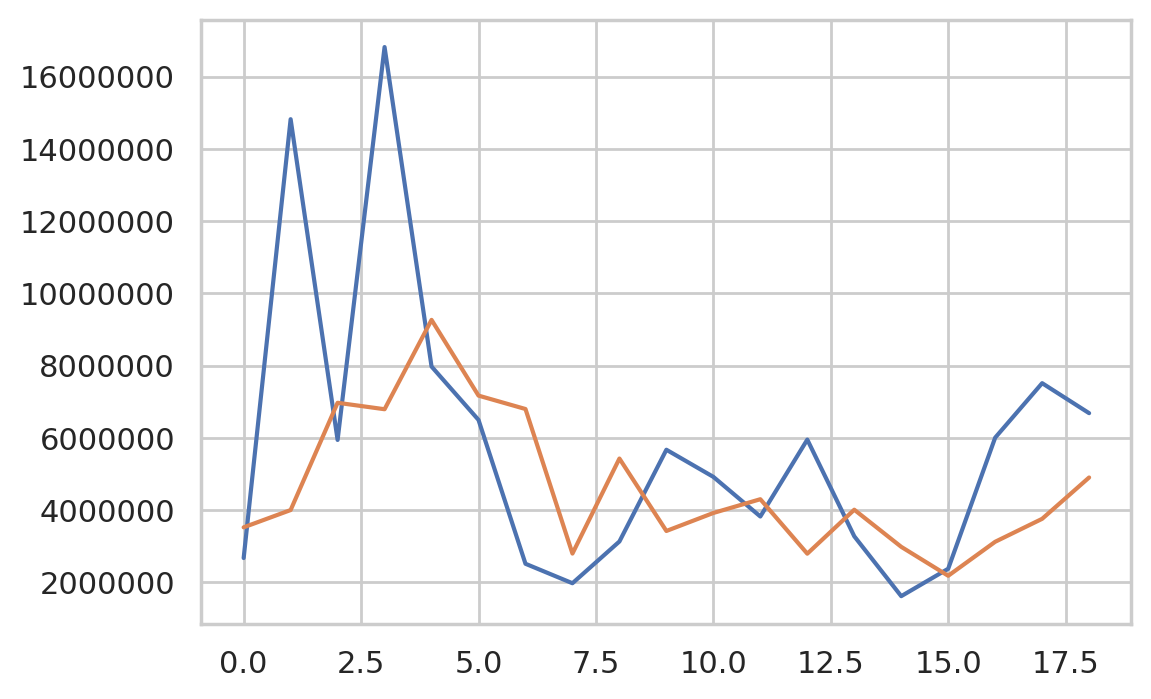

In [ ]:
plt.figure(dpi=200)
plt.ticklabel_format(style='plain')
# plt.plot(scaler.inverse_transform(test[4:]))
# plt.plot(scaler.inverse_transform(lstm.predict(test_generated)))

plt.plot(test[5:])
plt.plot(lstm.predict(test_generated))

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
test_predictions = lstm.predict(test_generated)

In [ ]:
np.sqrt(mean_squared_error(test[5:],test_predictions ))

3908221.216859842

In [ ]:
mean_absolute_error(test[5:],test_predictions)/1000000

2.615794235789474

In [ ]:
# test_predictions = []

# batch = train[-5:].reshape(1,batch_len,batch_count)

# for i in range(len(test)):
    
#     prediction = lstm.predict(batch)[0]
    
#     test_predictions.append(prediction)
    
#     batch = np.append(batch[:,1:,:], [[prediction]], axis=1)

In [ ]:
#test_predictions

In [ ]:
# plt.plot(test[5:])
# plt.plot(test_predictions)

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/AzPromo/forecasting_data_aze.xlsx')

In [ ]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
df

,Bəyannamənin tarixi,final_price_usd
0,2020-01-01,1796177.04
1,2020-01-02,351530.56
2,2020-01-03,1791654.20
3,2020-01-04,926612.98
4,2020-01-05,849528.84
...,...,...
236,2021-04-26,1613395.31
237,2021-04-27,2373002.95
238,2021-04-28,6002306.57
239,2021-04-29,7510963.55


In [ ]:
df['year'] = df['Bəyannamənin tarixi'].apply(lambda x: x.year)
df['month'] = df['Bəyannamənin tarixi'].apply(lambda x: x.month)

In [ ]:
temp = df.groupby(['year', 'month']).sum()

In [ ]:
final_price_usd = list(temp['final_price_usd'])

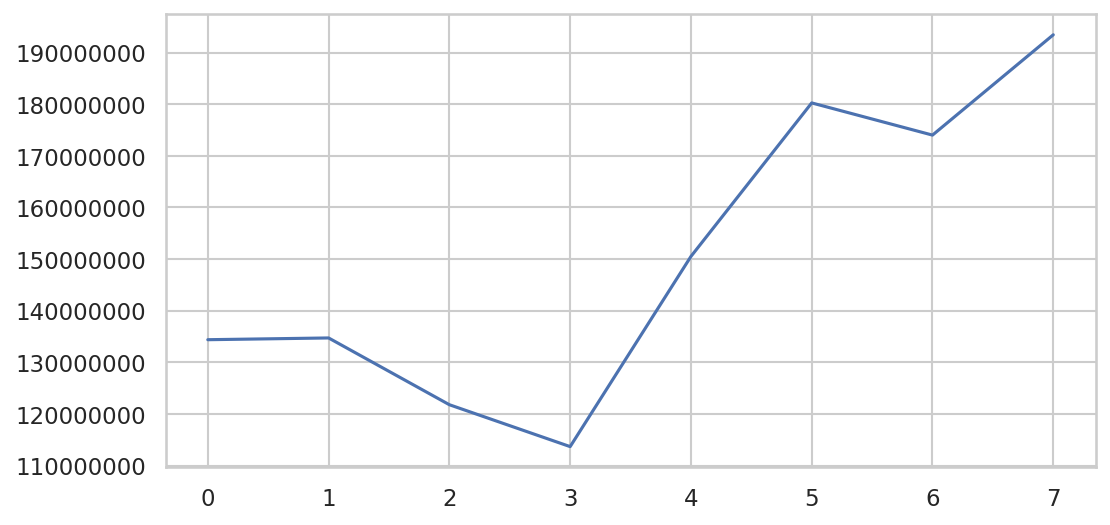

In [ ]:
plt.figure(dpi=150, figsize=(8, 4))

plt.ticklabel_format(style='plain')
plt.plot(final_price_usd)

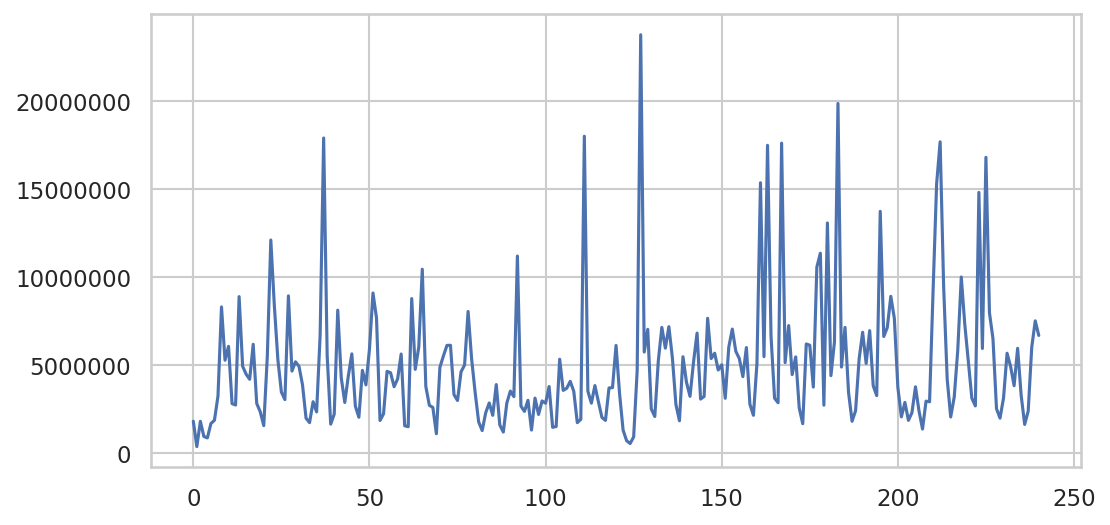

In [ ]:
plt.figure(dpi=150, figsize=(8, 4))
plt.ticklabel_format(style='plain')
plt.plot(df['final_price_usd'])

In [ ]:
sma = pd.DataFrame()
sma['final_price_usd'] = final_price_usd

In [ ]:
sma['simple_moving_average'] = sma['final_price_usd'].rolling(window=4).mean()

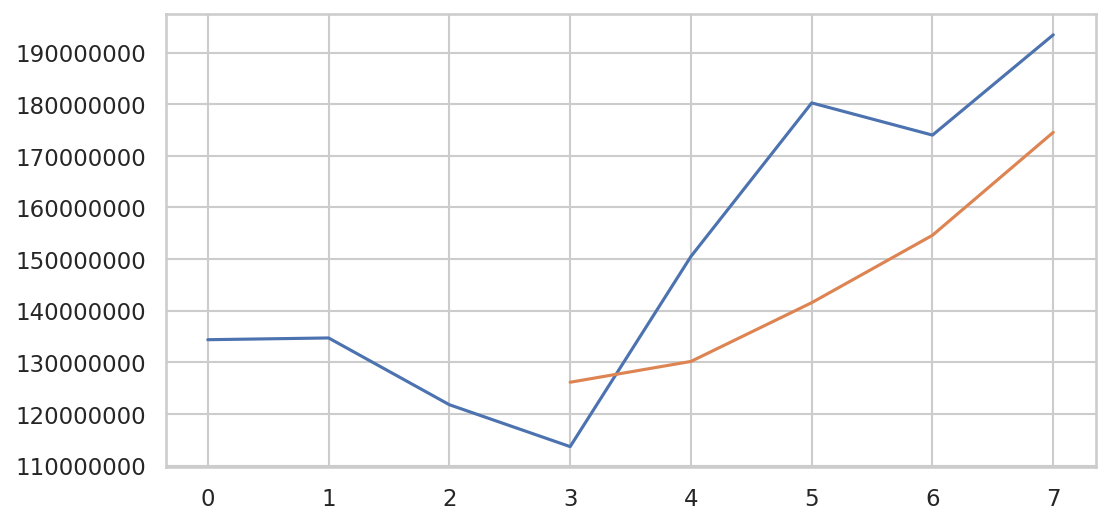

In [ ]:
plt.figure(dpi=150,figsize = (8, 4))
plt.ticklabel_format(style='plain')
plt.plot(sma['final_price_usd'])
plt.plot(sma['simple_moving_average'])

In [ ]:
sma['exponentially_moving_average'] = sma['final_price_usd'].ewm(span=4,adjust=False).mean()

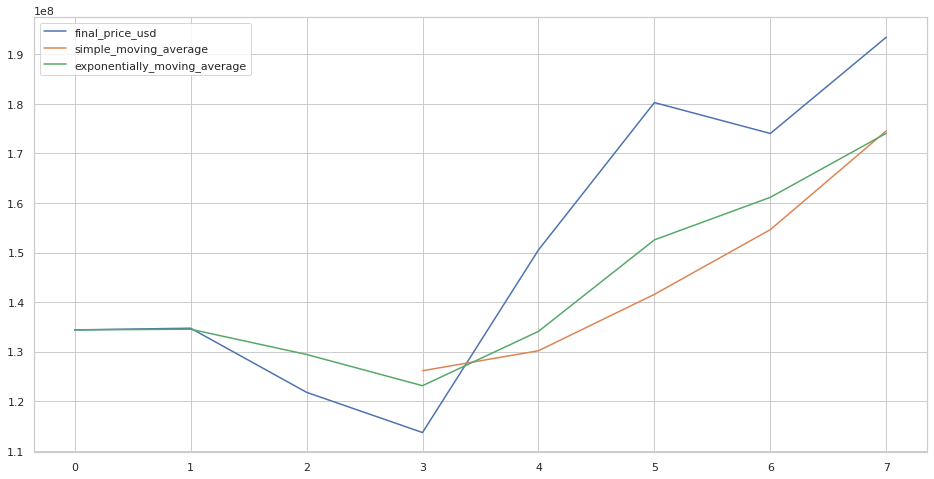

In [ ]:
sma.plot(figsize=(16, 8))

### Modeling

In [ ]:
df['final_price_usd']

0      1796177.04
1       351530.56
2      1791654.20
3       926612.98
4       849528.84
          ...    
236    1613395.31
237    2373002.95
238    6002306.57
239    7510963.55
240    6680226.46
Name: final_price_usd, Length: 241, dtype: float64

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
final_model = ExponentialSmoothing(df['final_price_usd'],trend='mul',seasonal='mul',seasonal_periods=120).fit()
forecast_predictions = final_model.forecast(121)

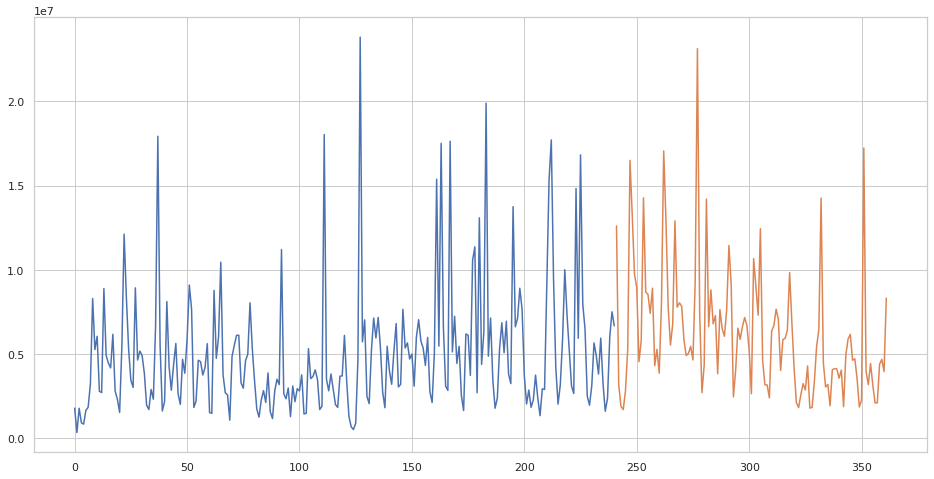

In [ ]:
df['final_price_usd'].plot(figsize=(16,8))
forecast_predictions.plot()

In [ ]:
round(sum(forecast_predictions[:32]))/1000000 # 2022 yanvar 253$ milyon dollar

253.053164

In [ ]:
round(sum(forecast_predictions[32:61]))/1000000 # 2022 fevral 205$ milyon dollar

205.364417

In [ ]:
round(sum(forecast_predictions[61:93]))/1000000 # 2022 fevral 178$ milyon dollar

178.367566

In [ ]:
round(sum(forecast_predictions[93:]))/1000000 # 2022 aprel 121$ milyon dollar

121.719937

In [ ]:
temp = df.groupby(['year', 'month']).sum()/1000000
temp

final_price_usd
year month                 
2020 1           134.382733
     2           134.722236
     3           121.787284
     4           113.670615
2021 1           150.511913
     2           180.255780
     3           174.019649
     4           193.451200

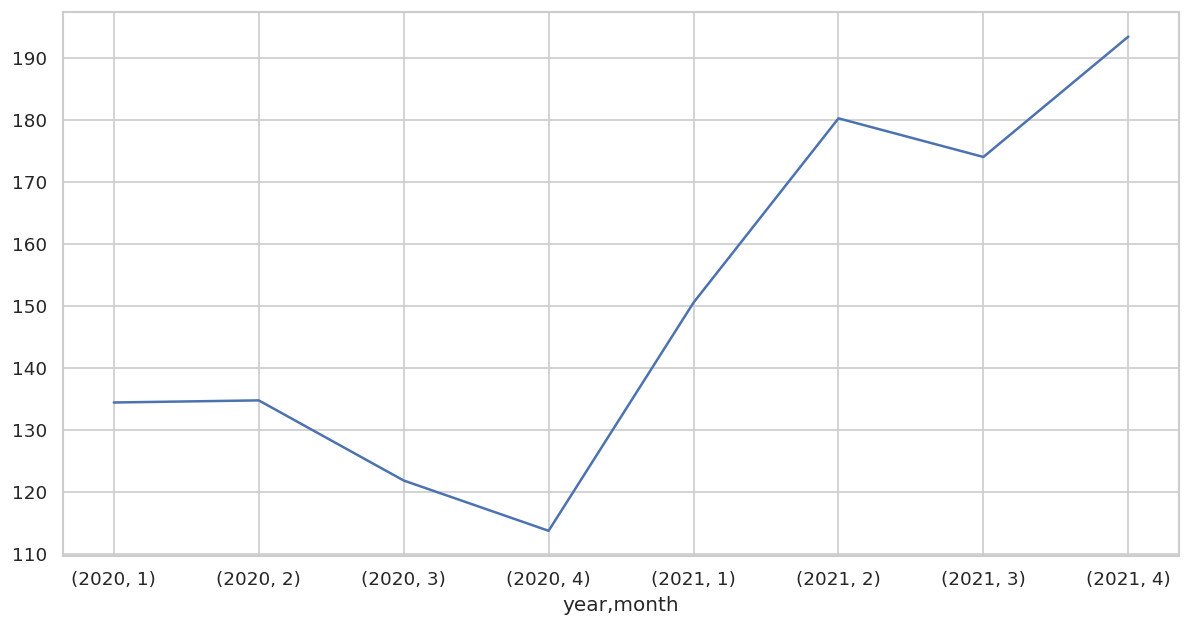

In [ ]:
plt.figure(dpi=120, figsize=(12, 6))
plt.xticks(rotation=90)
temp['final_price_usd'].plot()